# Step 1. Exploratory Data Analysis

---

In this step, we are exploring our dataset by loading it using our custom `dataset.load()` function. The resulting dataframe consists of the following columns:

- **ImgPath**: Path to the image.
- **FileType**: The extension of the image file.
- **Width**: The width (in pixels) of the image.
- **Height**: The height (in pixels) of the image.
- **Ratio**: The aspect ratio of the image. Calculated by taking its Width divided by its Height.
- **Mode**: The mode of the image. Possible values: [Pillow docs](https://pillow.readthedocs.io/en/latest/handbook/concepts.html#concept-modes).
- **Bands**: A string containing all bands of this image, separated by a space character. Read more: [bands](https://pillow.readthedocs.io/en/latest/handbook/concepts.html#bands).
- **Transparency**: Whether this image has transparency.
- **Animated**: Whether this image has more than one frame.
- **Class**: Type of flower in the image. Can be either one of our 8 flower types.

We are focusing on analyzing the following columns:

1. **FileType:** We are observing this to see how many different file formats there are in our dataset. These would need to be converted into a single format during data cleaning.
2. **Ratio:** From this, we will pick out the most common ratio for our images to be cropped into during data processing.
3. **Mode:** Related to transparency: There are only a few modes that support alpha channel necessary for transparency in an image.
4. **Transparency:** Machine learning algorithms does not play well with transparent images. We will need to process these.
5. **Animated:** Machine learning algorithms cannot process animated images (images with more than 1 frame). If we have such image in our dataset, we need to isolate and extract their individual frames.
6. **Class:** We are observing if our dataset is balanced or not.

In [1]:
# Imports and environmental setups

import matplotlib.pyplot as plt


# Custom utils functions
from utils import dataset
from utils.visualization import data_countplot
from utils.visualization import data_histplot


plt.style.use('ggplot')

## Load Dataset

Using our custom `dataset.load()` function.

In [2]:
df_raw = dataset.load('../data/raw')

In [3]:
df_raw.describe()

,Width,Height,Ratio
count,16362.000000,16362.000000,16362.000000
mean,693.434360,692.961374,1.039756
std,550.176343,580.224863,0.303225
min,100.000000,100.000000,0.475460
25%,266.250000,260.000000,0.793478
50%,600.000000,546.500000,1.000000
75%,894.000000,850.000000,1.164596
max,5472.000000,5184.000000,3.317073


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16362 entries, 0 to 16361
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ImgPath       16362 non-null  object 
 1   FileType      16362 non-null  object 
 2   Width         16362 non-null  int64  
 3   Height        16362 non-null  int64  
 4   Ratio         16362 non-null  float64
 5   Mode          16362 non-null  object 
 6   Bands         16362 non-null  object 
 7   Transparency  16362 non-null  bool   
 8   Animated      16362 non-null  bool   
 9   Class         16362 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [5]:
df_raw.sample(n=42, random_state=42)

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Class
5379,Chrysanthemum/001293.jpg,jpg,1280,853,1.500586,RGB,R G B,False,False,Chrysanthemum
6176,Hydrangeas/000026.jpg,jpg,600,450,1.333333,RGB,R G B,False,False,Hydrangeas
10769,Pingpong/000481.jpg,jpg,1000,1333,0.750188,RGB,R G B,False,False,Pingpong
7593,Hydrangeas/001443.jpg,jpg,760,442,1.719457,RGB,R G B,False,False,Hydrangeas
10662,Pingpong/000374.jpg,jpg,600,749,0.801068,RGB,R G B,False,False,Pingpong
2087,Calimerio/000026.jpg,jpg,1024,768,1.333333,RGB,R G B,False,False,Calimerio
123,Baby/000124.jpg,jpg,800,1131,0.707339,RGB,R G B,False,False,Baby
8962,Lisianthus/000764.jpg,jpg,521,587,0.887564,RGB,R G B,False,False,Lisianthus
10010,Lisianthus/lisianthus_720.jpg,jpg,219,230,0.952174,RGB,R G B,False,False,Lisianthus
8419,Lisianthus/000221.jpg,jpg,750,1000,0.750000,RGB,R G B,False,False,Lisianthus


## Plotting

Important columns: FileType, Ratio, Mode, Transparency, Animated, and Class.

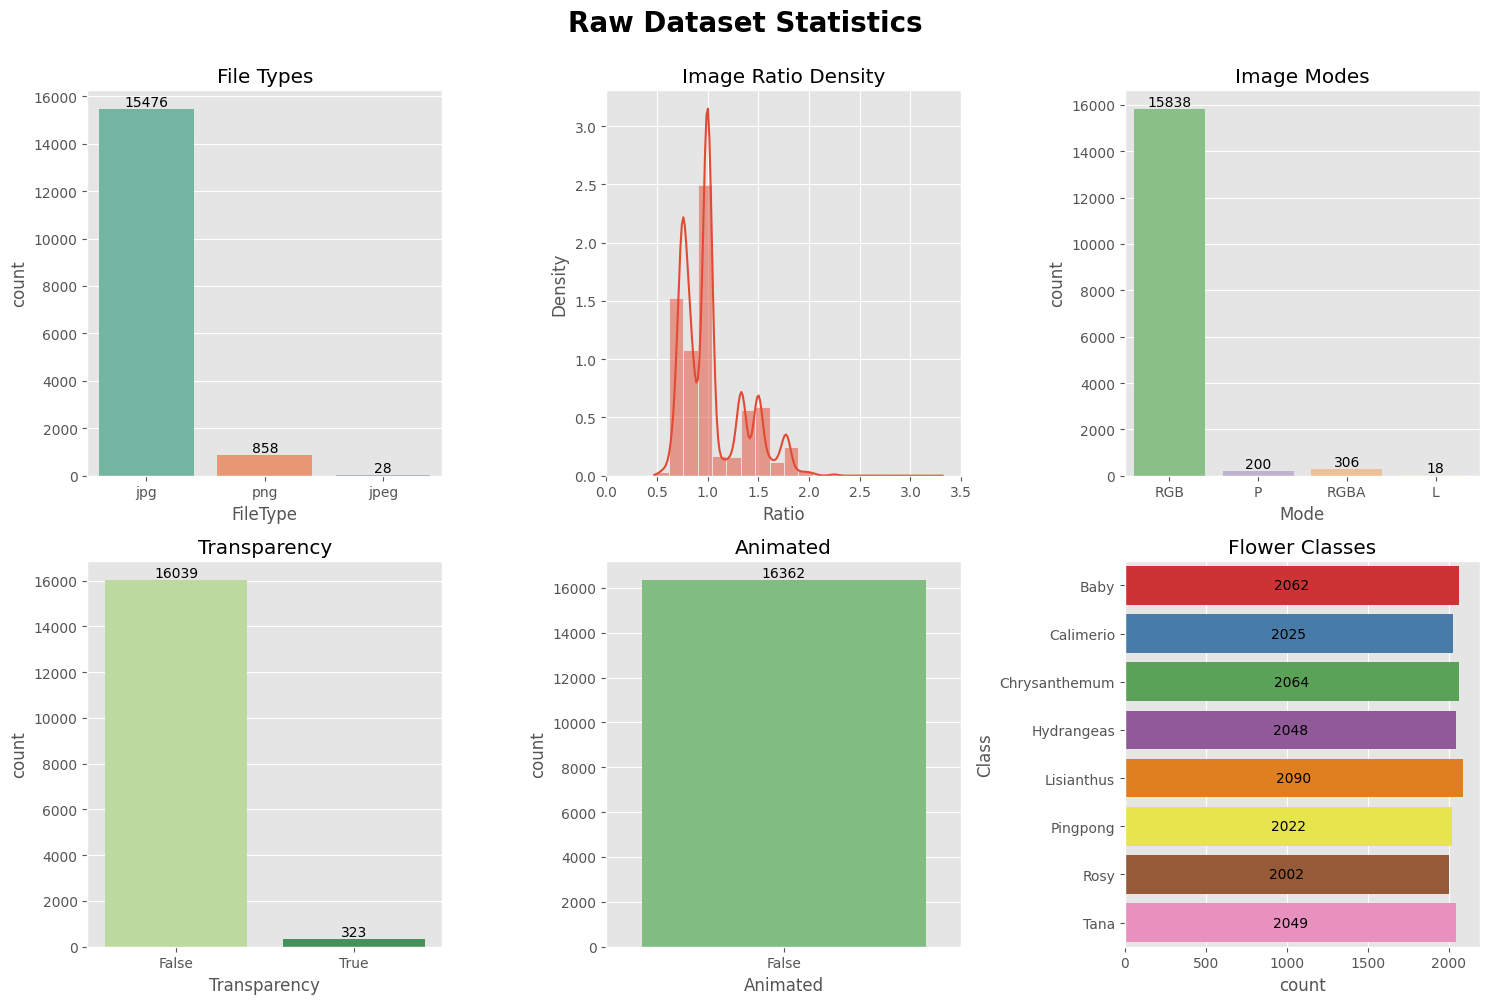

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

data_countplot(df_raw, 'FileType', ax=ax[0][0], title='File Types', annotate=True, palette='Set2')
data_histplot(df_raw, 'Ratio', ax=ax[0][1], title='Image Ratio Density', bins=20, kde=True, stat='density')
data_countplot(df_raw, 'Mode', ax=ax[0][2], title='Image Modes', annotate=True, palette='Accent')
data_countplot(df_raw, 'Transparency', ax=ax[1][0], title='Transparency', annotate=True, palette='YlGn')
data_countplot(df_raw, 'Animated', ax=ax[1][1], title='Animated', annotate=True, palette='YlGn')
data_countplot(df_raw, 'Class', ax=ax[1][2], horizontal=True, title='Flower Classes', xticklabels_rotation=45, annotate=True, palette='Set1')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)

fig.tight_layout(rect=[0, 0, 1, 1])
fig.savefig('images/EDA-RawDataset-Stats.png')

## ☞ Observation

### FileType

There are

### Ratio

From this, we will pick out the most common ratio for our images to be cropped into during data processing.

### Mode and Transparency

### Animated Images

### Class